### Simple linear Regression

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")

#### Step 1- Data ingestion(Read the Dataset)

In [7]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")

df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### STep 2 - Visualizing DAta using parplot

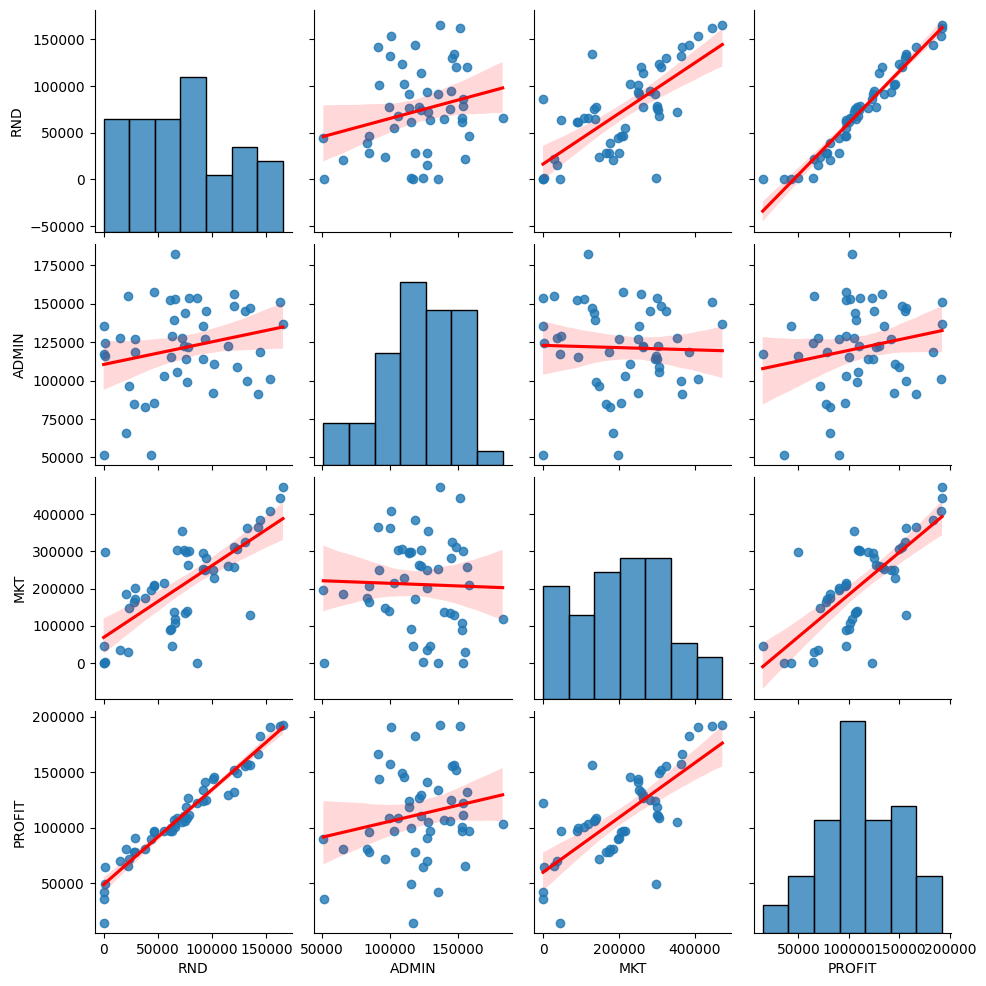

In [8]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

<Axes: xlabel='RND', ylabel='PROFIT'>

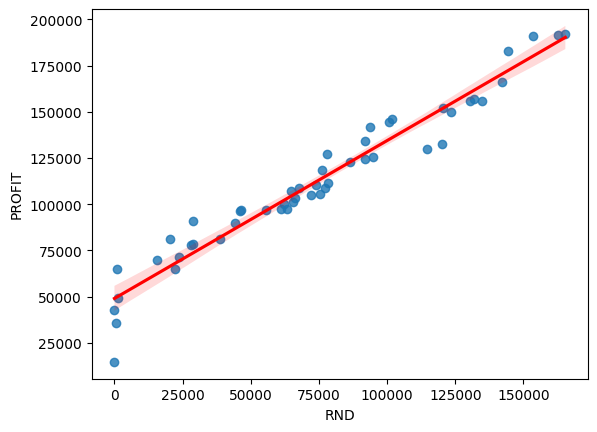

In [9]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

In [10]:
  df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


###

### problem - predict Profit based on RND
1. Profit ~ RND profit is dependant RND
2. Profit is target feature , RND is preditor
3. Profit_pred = BO + B1 * RND

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
### This show there are no missing values

###

### step 3 - seperate X and Y

In [15]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [16]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [17]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create Linear Regression Model

In [18]:
pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
model.intercept_

array([49032.89914125])

In [22]:
model.coef_

array([[0.85429137]])

#### PROFIT_pred = 49032.9 + 0.8543 x RND
#### IF RND increase by 1 USD the PROFIT will increase by 0.8543 approximately
#### IF RND increase by 1000 USD then PROFIT will increase by 854.3 USD Approximately


### Step - 5 Model Evaluation

In [24]:
### R2 score
model.score(X, Y)

0.9465353160804393

In [25]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [26]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [28]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [34]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    ## calculate dif matrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    ## print the values
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [35]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


#### R2 Score >= 0.8 hence above model is a good model
#### Hence i can use this model for out of sample prediction

### Step 6 Out of sample prediction

In [36]:
rnd = 1_50_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit:{profit_pred}")

Estimated profit:[[177176.60478207]]


In [37]:
rnd = 10_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit : {profit_pred}")

Estimated profit : [[57575.81285064]]


In [38]:
rnd = 3_00_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit : {profit_pred}")

Estimated profit : [[305320.31042289]]
